In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
def createViz(fileName, xLow, xHigh, yLow, yHigh):
    """Inputs: fileName, xLow, xHigh, yLow, yHigh
Outputs: Returns nothing but prints a 2D heatmap and a txt file
that can be read by the Unity application to print a 3D heatmap.
The x coordinates must be in a column named X and y in Y."""
    vizMap = pd.read_csv('Data/' + fileName)
    vizMap = vizMap[(vizMap.X <= xHigh) & (vizMap.X >= xLow) & (vizMap.Y <= yHigh) & (vizMap.Y >= yLow)]
    x = vizMap.X.tolist()
    y = vizMap.Y.tolist()
    lengthX = xHigh - xLow
    lengthY = yHigh - yLow
    if lengthX > lengthY:
        diffX = 10
        diffY = round(lengthY / lengthX * 10)
    else:
        diffY = 10
        diffX = round(lengthX / lengthY * 10)
    xSize = lengthX / diffX
    ySize = lengthY / diffY
    heat = [[0 for d in range(diffX)] for e in range(diffY)]
    for column in range(diffY):
        for row in range(diffX):
            heat[column][row] = 0
            for cell in range(0,len(x)):
                if x[cell] > xLow + (xSize * row) and x[cell] < xLow + (xSize * (row+1)) and \
                y[cell] > yLow + (ySize * column) and y[cell] < yLow + (ySize * (column+1)):
                    heat[column][row] += 1
    maxVal = 0
    for row in heat:
        for value in row:
            if value > maxVal:
                maxVal = value
    maxVal = maxVal / 100.0
    nheat = (np.matrix(heat)/maxVal).tolist()
    file = open('data.txt', 'w')
    file.truncate()
    for row in nheat:
        for item in row:
            file.write(str(item) + ',')
        file.write('\n')
    file.close()
    plt.imshow(nheat, interpolation='nearest')
    plt.show()

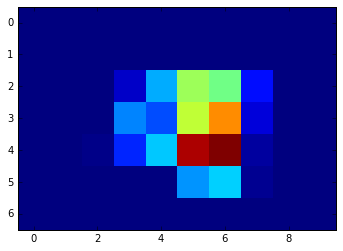

In [61]:
createViz('sanfrancisco_final.csv', -122.6, -122.3, 37.65, 37.85)